In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
### lets try some machine leaning here #####
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')

In [5]:
data = pd.read_csv('dataSet/combinedData_withIndex.csv',header=0  ,)
display(data)

,index,Tx byte difference,Tx packets differnce,status
0,1,1291518,23917,1
1,2,1256314,23265,1
2,3,10417,40,0
3,4,0,0,0
4,5,10233,36,0
...,...,...,...,...
1895,1896,6756,23,0
1896,1897,0,0,0
1897,1898,6360,17,0
1898,1899,1293840,23960,1


In [7]:
targets = data['status']

features = data.drop(columns= ['status', 'index'])



In [8]:
features

,Tx byte difference,Tx packets differnce
0,1291518,23917
1,1256314,23265
2,10417,40
3,0,0
4,10233,36
...,...,...
1895,6756,23
1896,0,0
1897,6360,17
1898,1293840,23960


In [9]:
targets

0       1
1       1
2       0
3       0
4       0
       ..
1895    0
1896    0
1897    0
1898    1
1899    1
Name: status, Length: 1900, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [104]:

X = features.values
y = targets.values

X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.5)


In [229]:
minmaxScaller = MinMaxScaler(feature_range=(0,1))



the shape of X_train is  (950, 2)
the shape of X-train_s is  (950, 1)


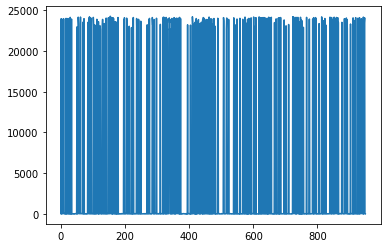

In [230]:
X_train_s = select.fit_transform(X_train, y_train)

X_test_s = select.transform(X_test)

print('the shape of X_train is ', X_train.shape)
print('the shape of X-train_s is ', X_train_s.shape)


plt.plot(X_test_s) ### packet Tx was selected here


In [236]:
X_train_scalled = minmaxScaller.fit_transform(X_train_s)
X_test_scalled = minmaxScaller.fit_transform(X_test_s)


minmaxScaller.scale_



array([0.])

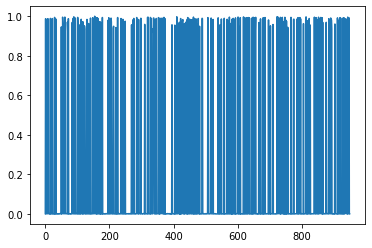

In [138]:
plt.plot(X_test_scalled)

In [139]:
from sklearn.linear_model import LogisticRegression

In [142]:
logReg = LogisticRegression(max_iter=100 ,C=100)

In [143]:
logReg.fit(X_train_scalled,y_train)
scoreTest  = logReg.score(X_test_scalled,y_test)
scoreTrain = logReg.score(X_train_scalled,y_train)

print("the score on training data is {:.3f}".format(scoreTrain))
print("the score on testing data is {:.3f}".format(scoreTest))

the score on training data is 1.000
the score on testing data is 1.000


In [148]:
forest = RandomForestClassifier( random_state=47, n_estimators=100, max_features="sqrt")
forest.fit(X_train_scalled,y_train)

forestScoreTest   = forest.score(X_test_scalled, y_test)
forestScroreTrain = forest.score(X_train_scalled, y_train)

print("the score on the training data is {:.3f}".format(forestScroreTrain))
print("the score on the test data is {:.3f}".format(forestScoreTest))

the score on the training data is 1.000
the score on the test data is 1.000


In [279]:

# print(X_test_scalled[0:2])
my_test_1 = X_test_scalled[0:2]

print(my_test_1/minmaxScaller.scale_)

realData = np.array([[0],
                    [0]])

scalled_realData = realData*minmaxScaller.scale_

mData = minmaxScaller.inverse_transform(my_test_1)


forest.predict(scalled_realData)




[[   36.]
 [23967.]]


array([0, 0], dtype=int64)

In [280]:
feat_imp = pd.Series(forest.feature_importances_)

In [282]:
print(feat_imp)

0    1.0
dtype: float64


In [287]:
import joblib

In [288]:
# Save the model as a pickle in a file
joblib.dump(forest , 'ddos_randomForestClass.pkl')
# Save the model as a pickle in a file
joblib.dump(logReg , 'ddos_logisticRegression.pkl')

['ddos_logisticRegression.pkl']